#Trabalho 1 - Aprendizado de Máquina

Alunos:

Vitor Yuki Inumaru Ferreira - 794041

Pedro Marchi Nunes - 801053

Karys Cristina da Silva Barbosa - 811871



## 1. Sobre o dataset

Utilizaremos como material de estudo um dataset retirado do kaggle sobre expectativa de vida em cada país.

Descrição: Embora tenha havido muitos estudos realizados no passado sobre fatores que afetam a expectativa de vida, considerando variáveis ​​demográficas, composição de renda e taxas de mortalidade, descobriu-se que o efeito da imunização e do índice de desenvolvimento humano não foi levado em consideração no passado. Além disso, algumas das pesquisas anteriores foram feitas considerando regressão linear múltipla com base em um conjunto de dados de um ano para todos os países. Portanto, isso dá motivação para resolver ambos os fatores declarados anteriormente, formulando um modelo de regressão com base no modelo de efeitos mistos e regressão linear múltipla, considerando dados de um período de 2000 a 2015 para todos os países. Imunizações importantes como hepatite B, poliomielite e difteria também serão consideradas. Em suma, este estudo se concentrará em fatores de imunização, fatores de mortalidade, fatores econômicos, fatores sociais e outros fatores relacionados à saúde também. Como as observações deste conjunto de dados são baseadas em diferentes países, será mais fácil para um país determinar o fator preditivo que está contribuindo para menor valor da expectativa de vida. Isso ajudará a sugerir ao país qual área deve receber importância para melhorar eficientemente a expectativa de vida de sua população.

Nome do dataset: Life Expectancy (WHO)
Link: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

## 2. Importação das bibliotecas

In [ ]:
!pip -q install plotly

In [ ]:
!pip -q install yellowbrick

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from numpy import hstack
from yellowbrick.classifier import ConfusionMatrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import plotly.graph_objects as go
from plotly.subplots import make_subplots


##3. Pré-Processamento



In [ ]:
# Baixar o dataset usando kagglehub (mantendo o formato do comando)
image_dir_path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

# Encontrar o caminho do arquivo CSV dentro do diretório baixado
csv_path = os.path.join(image_dir_path, "Life Expectancy Data.csv")

# Carregar o dataset como DataFrame
df = pd.read_csv(csv_path)

# Visualizar os dados
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Dados faltantes por coluna

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
target_col = 'Life expectancy '
colunas = ['infant deaths', 'Adult Mortality', 'Income composition of resources', 'Schooling']

rows = 2
cols = 2
fig = make_subplots(rows=rows, cols=cols, subplot_titles=colunas)

for i, coluna in enumerate(colunas):
    row = i // cols + 1
    col = i % cols + 1
    fig.add_trace(
        go.Scatter(x=df[coluna], y=df[target_col], mode='markers', name=coluna),
        row=row, col=col
    )

fig.update_layout(height=600, width=800, title_text="Life Expectancy vs Variáveis", showlegend=False)
fig.update_xaxes(title_text="Valor")
fig.update_yaxes(title_text="Life Expectancy")

fig.show()

In [ ]:
# Colunas categóricas que não serão usadas no treinamento
categorical_cols = ['Country', 'Status']

# Separar colunas categóricas e numéricas
categorical_data = df[categorical_cols].copy()
numeric_cols = df.drop(columns=categorical_cols + ['Life expectancy ']).select_dtypes(include=np.number).columns.tolist()
numeric_data = df[numeric_cols].copy()

# Codificar colunas categóricas
encoder = OrdinalEncoder()
categorical_encoded = encoder.fit_transform(categorical_data)

# Padronizar colunas numéricas
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_data)

# Concatenar para imputação
dados_para_imputar = hstack([categorical_encoded, numeric_scaled])

# Aplicar KNNImputer
imputer = KNNImputer(n_neighbors=5)
dados_imputados = imputer.fit_transform(dados_para_imputar)

# Separar de volta categorias e números
categorical_imputado = dados_imputados[:, :len(categorical_cols)]
numeric_imputado = dados_imputados[:, len(categorical_cols):]

# Decodificar categorias e despadronizar números
categorical_decoded = encoder.inverse_transform(categorical_imputado)
df_categoricas_imputadas = pd.DataFrame(categorical_decoded, columns=categorical_cols)

# Manter numéricos padronizados
df_numericos_imputados = pd.DataFrame(numeric_imputado, columns=numeric_cols)

# Substituir no df original
df[categorical_cols] = df_categoricas_imputadas
df[numeric_cols] = df_numericos_imputados


In [ ]:
df = df.dropna(subset=['Life expectancy '])
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1.621762,Developing,65.0,0.790238,0.268824,-1.133571,-0.335570,-0.635971,-0.110384,...,-3.268019,0.889486,-0.730578,-0.323445,-0.483546,0.343993,2.796805,2.757185,-0.704483,-0.563614
1,Afghanistan,1.404986,Developing,59.9,0.854614,0.285786,-1.133571,-0.334441,-0.755661,-0.168124,...,-1.048077,0.897493,-0.857092,-0.323445,-0.481553,-0.203706,2.864687,2.801550,-0.718710,-0.593391
2,Afghanistan,1.188210,Developing,59.9,0.830473,0.302749,-1.133571,-0.334594,-0.675868,-0.173531,...,-0.877312,0.877476,-0.772749,-0.323445,-0.480218,0.311126,2.909942,2.845914,-0.747164,-0.623168
3,Afghanistan,0.971434,Developing,59.5,0.862660,0.328193,-1.133571,-0.332096,-0.556178,0.032045,...,-0.663856,1.033609,-0.646235,-0.323445,-0.477539,-0.148469,2.955197,2.912461,-0.780360,-0.652944
4,Afghanistan,0.754658,Developing,59.2,0.886801,0.345155,-1.133571,-0.367862,-0.516281,0.051757,...,-0.621165,0.773387,-0.604064,-0.323445,-0.520044,-0.160246,3.023079,2.956826,-0.823042,-0.742275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,-0.762774,Developing,44.3,4.491830,-0.028022,-0.059941,-0.371433,-0.516281,-0.208332,...,-0.663856,0.477133,-0.730578,6.275044,-0.492650,0.000396,1.031873,1.004786,-1.045932,-0.831606
2934,Zimbabwe,-0.979550,Developing,44.5,4.427455,-0.036503,-0.133984,-0.371433,-2.949977,-0.123991,...,-3.225328,0.232924,-0.604064,6.885650,-0.492722,-0.001959,1.122383,1.115698,-0.993766,-0.742275
2935,Zimbabwe,-1.196326,Developing,44.8,-0.738680,-0.044984,-0.042664,-0.371433,-0.316798,-0.184521,...,-0.407709,0.236927,-0.477551,7.496256,-0.520477,-0.207018,-0.823568,-0.791977,-0.951085,-0.593391
2936,Zimbabwe,-1.413102,Developing,45.3,4.194093,-0.044984,-0.711523,-0.371433,-0.197108,-0.164897,...,-0.279635,0.088800,-0.308866,7.949287,-0.486046,-0.006348,-0.733059,-0.703248,-0.951085,-0.652944


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


Agora sem dados faltantes, vamos seguir

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1.621762,Developing,65.0,0.790238,0.268824,-1.133571,-0.335570,-0.635971,-0.110384,...,-3.268019,0.889486,-0.730578,-0.323445,-0.483546,0.343993,2.796805,2.757185,-0.704483,-0.563614
1,Afghanistan,1.404986,Developing,59.9,0.854614,0.285786,-1.133571,-0.334441,-0.755661,-0.168124,...,-1.048077,0.897493,-0.857092,-0.323445,-0.481553,-0.203706,2.864687,2.801550,-0.718710,-0.593391
2,Afghanistan,1.188210,Developing,59.9,0.830473,0.302749,-1.133571,-0.334594,-0.675868,-0.173531,...,-0.877312,0.877476,-0.772749,-0.323445,-0.480218,0.311126,2.909942,2.845914,-0.747164,-0.623168
3,Afghanistan,0.971434,Developing,59.5,0.862660,0.328193,-1.133571,-0.332096,-0.556178,0.032045,...,-0.663856,1.033609,-0.646235,-0.323445,-0.477539,-0.148469,2.955197,2.912461,-0.780360,-0.652944
4,Afghanistan,0.754658,Developing,59.2,0.886801,0.345155,-1.133571,-0.367862,-0.516281,0.051757,...,-0.621165,0.773387,-0.604064,-0.323445,-0.520044,-0.160246,3.023079,2.956826,-0.823042,-0.742275


## 4. Visualização dos dados

### Histograma da Expecativa de Vida

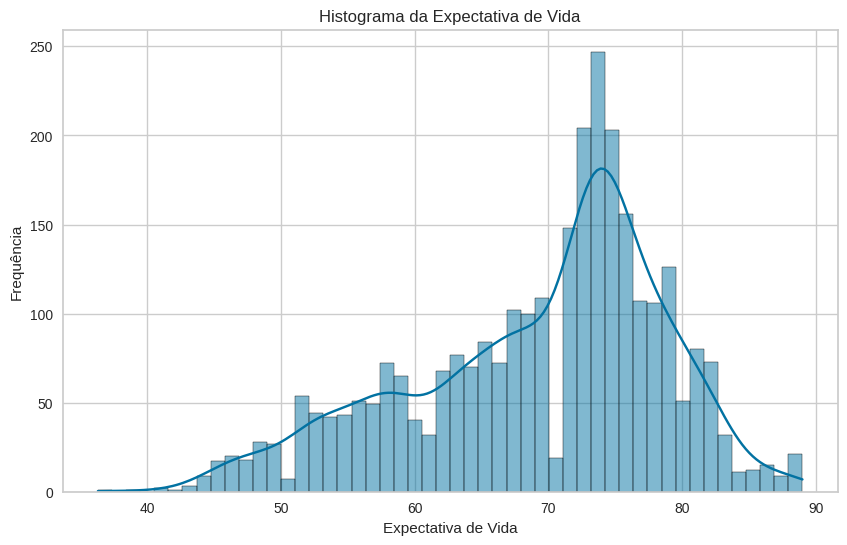

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '], bins=50, kde=True)
plt.title('Histograma da Expectativa de Vida')
plt.xlabel('Expectativa de Vida')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

### Matriz de Correlação

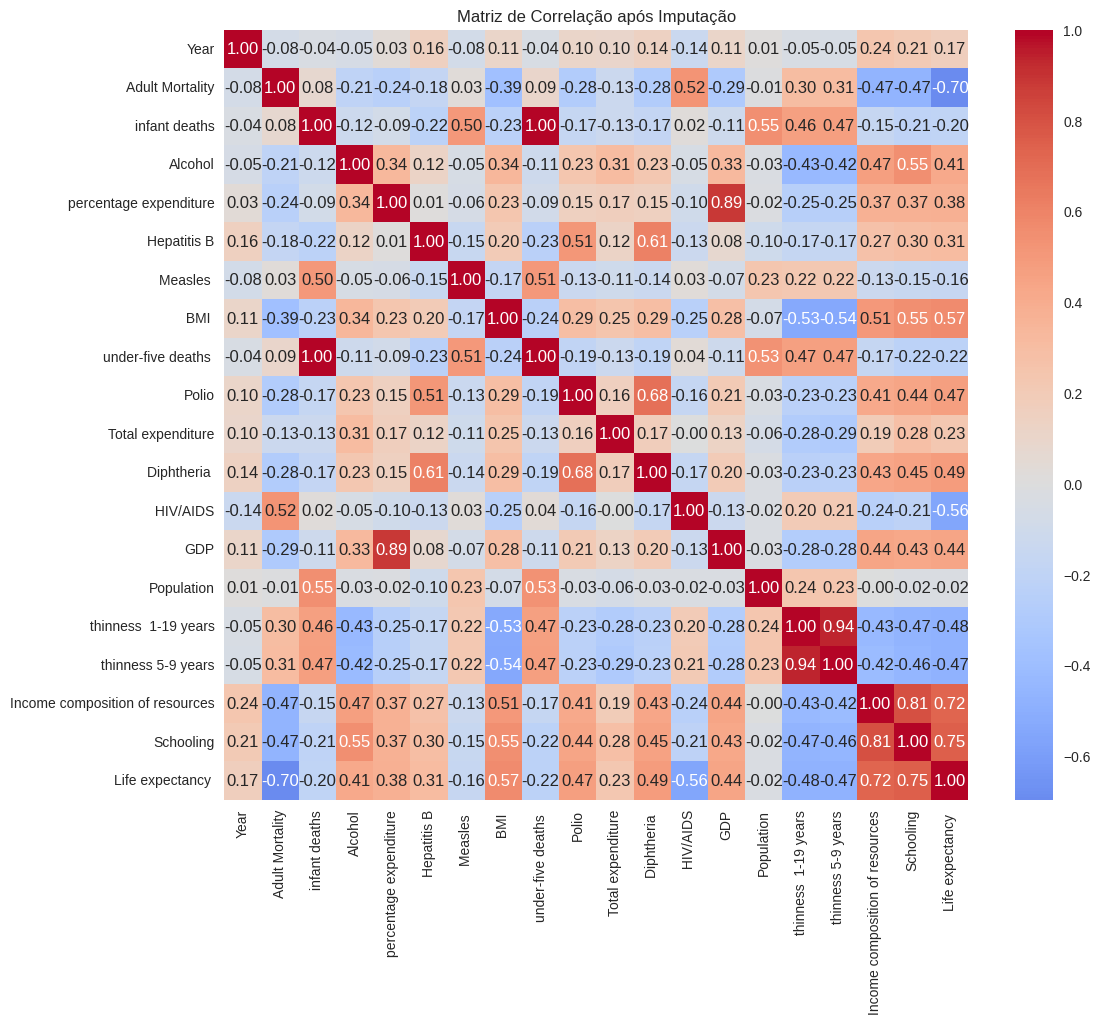

In [ ]:
# Inclui novamente a coluna alvo
df_corr = df[numeric_cols + ['Life expectancy ']]

# Calcula a matriz de correlação
correlation_matrix = df_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação após Imputação')
plt.show()

Através desta tabela de correlação fica evidente que alguns atributos possuem menor correlação sobre a expecatativa de vida. Este fato será explorado mais a frente nos códigos.

## 5. Divisão das classes

Para aplicar os conceitos aprendidos na disciplina, foi necessário transformar a variável contínua da expectativa de vida em categorias. Como o conjunto de dados não possuía classes definidas, optou-se por tentar identificar agrupamentos naturais nos dados por meio de técnicas de clustering. Para determinar o número ideal de grupos, foram utilizados dois métodos: o método do cotovelo, que analisa a variação da inércia com o aumento de clusters, e o índice de silhueta, que avalia a coesão e separação entre os grupos formados.

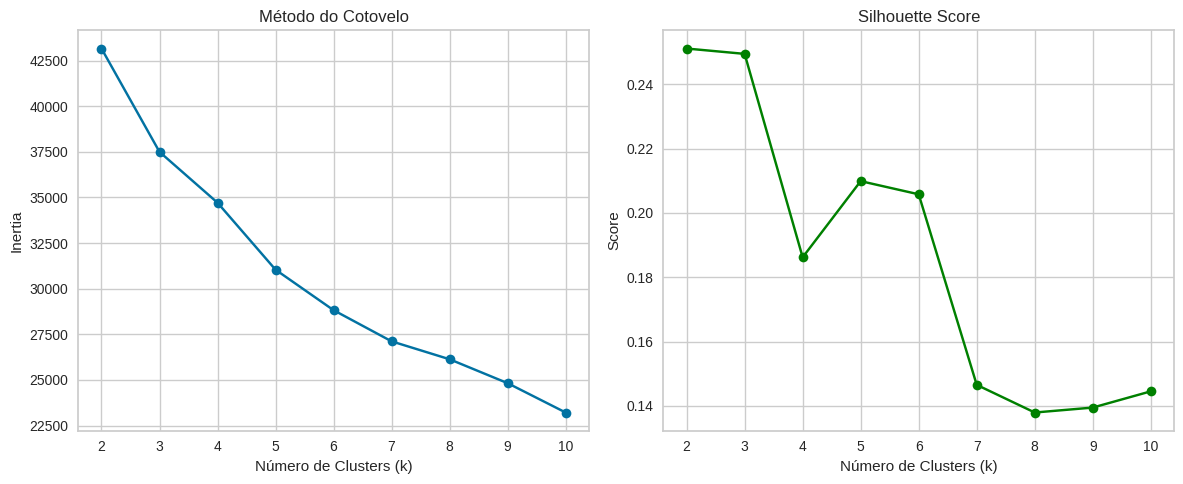

In [ ]:
X = df[numeric_cols].copy()

#Testar diferentes valores de K
inertias = []
silhouettes = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)

    inertias.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, labels)
    silhouettes.append(silhouette_avg)

# Plotar os resultados
plt.figure(figsize=(12, 5))

# Método do cotovelo
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

###Definindo as classes através do atributo "Life Expectancy"

Esse dataset é utilizado para tarefas de regressão linear e por isso não existem classes já existentes; como solução nosso grupo vai criar 4 classes de expectativa de vida:
Ótima
Boa
Regular
Ruim

Onde iremos definir em intervalos os valores do atributo já existente e então a partir disso usar o dataset para as tarefas de classificação.

In [ ]:
# Encontrando as faixas dos grupos com o mesmo número de elementos
df['faixa_expectativa'] = pd.qcut(df['Life expectancy '], q=4)

# Exibir os intervalos usados
print(df['faixa_expectativa'].unique())

[(63.1, 72.1], (36.299, 63.1], (75.7, 89.0], (72.1, 75.7]]
Categories (4, interval[float64, right]): [(36.299, 63.1] < (63.1, 72.1] < (72.1, 75.7] <
                                           (75.7, 89.0]]


In [ ]:
# Criar os bins com base nos limites do qcut e no histograma
bins = [36, 60, 72, 80, 90]
labels = ['Ruim', 'Regular', 'Boa', 'Ótima']

# Aplicar o pd.cut com os mesmos limites
df['Life Expectancy Class'] = pd.cut(df['Life expectancy '], bins=bins, labels=labels, include_lowest=True)

In [ ]:
grafico = px.scatter_matrix(df, dimensions=['Country', 'Year'], color = 'Life Expectancy Class')
grafico.show()

In [ ]:
grafico = px.scatter_matrix(df, dimensions=['Adult Mortality', 'Year'], color = 'Life Expectancy Class')
grafico.show()

<ipython-input-226-263c7d313d2a>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




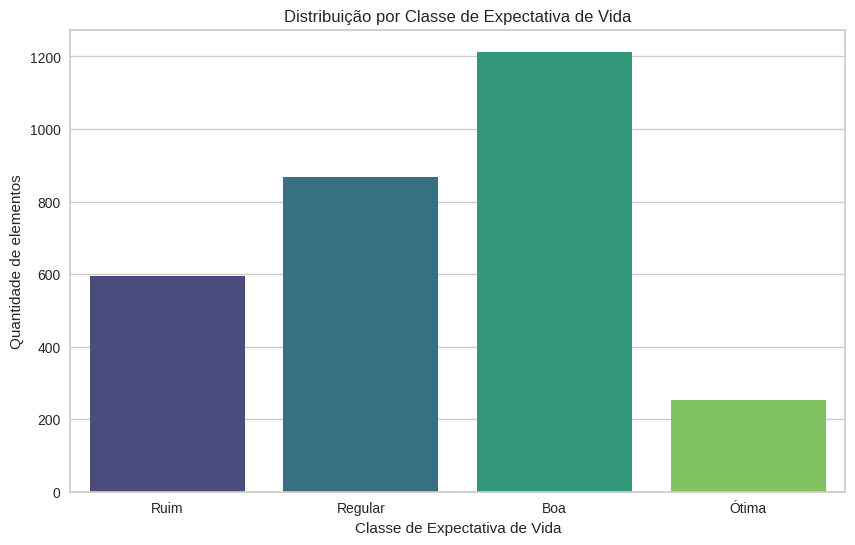

In [ ]:
# Tirando as duplicações
df_unique_countries = df.drop_duplicates(subset=['Country'])
# Contando as ocorrências
class_counts = df['Life Expectancy Class'].value_counts().sort_index()
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribuição por Classe de Expectativa de Vida')
plt.xlabel('Classe de Expectativa de Vida')
plt.ylabel('Quantidade de elementos')
plt.show()

In [ ]:
print(df['Life Expectancy Class'].value_counts())

Life Expectancy Class
Boa        1213
Regular     868
Ruim        594
Ótima       253
Name: count, dtype: int64


<ipython-input-228-2fccd6050110>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-228-2fccd6050110>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




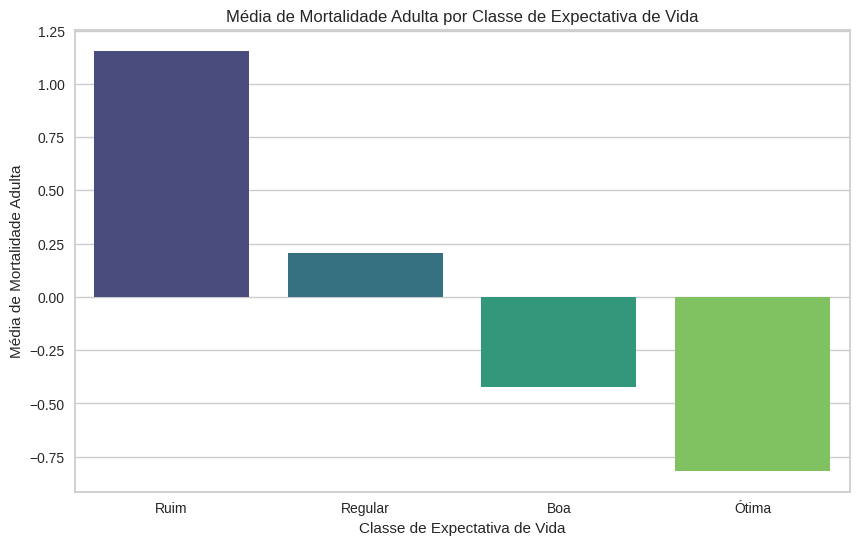

In [ ]:

df_histogram = df.drop_duplicates(subset=['Country']).copy()

class_mapping = {'Ruim': 1, 'Regular': 2, 'Boa': 3, 'Ótima': 4}
df_histogram['Life Expectancy Class Numeric'] = df_histogram['Life Expectancy Class'].map(class_mapping)


# Calcular a média de Adult Mortality por classe de Life Expectancy
avg_adult_mortality_by_class = df_histogram.groupby('Life Expectancy Class')['Adult Mortality'].mean().reindex(['Ruim', 'Regular', 'Boa', 'Ótima'])

# Plotar o barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_adult_mortality_by_class.index, y=avg_adult_mortality_by_class.values, palette='viridis')
plt.title('Média de Mortalidade Adulta por Classe de Expectativa de Vida')
plt.xlabel('Classe de Expectativa de Vida')
plt.ylabel('Média de Mortalidade Adulta')
plt.show()

É importante ver as principais hipóteses antes de irmos para os classificadores de fatos pois assim conseguimos criar nossas primeiras hipóteses e enfim ao aplicar as tarefas de aprendizado de máquinas podemos refutá-las ou não.

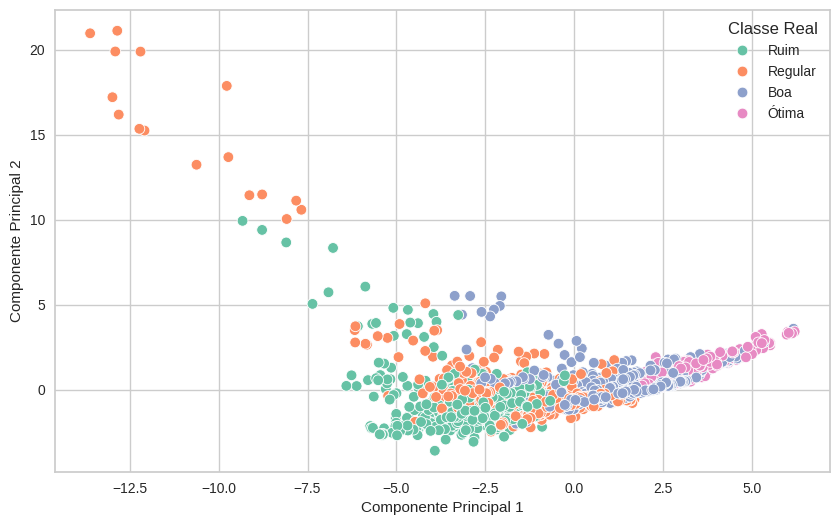

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numeric_cols])

df_pca_class = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca_class['Classe'] = df['Life Expectancy Class'].values

# Plotando
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_class, x='PC1', y='PC2', hue='Classe', palette='Set2', s=60)
#plt.title("Visualização das Classes Reais com PCA (2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Classe Real')
plt.grid(True)
plt.show()

## 6. Separando conjunto de testes e treinamentos

In [ ]:
# Separando as features (X) e a variável alvo (y)
X = df.drop(columns=['Country', 'Status', 'Life expectancy ', 'Life Expectancy Class'])
y = df['Life Expectancy Class']

# Identificando os atributos numéricos
numeric_features = X.select_dtypes(include=np.number).columns.tolist()

# Criando um novo DataFrame com os atributos numéricos padronizados
df_padronizado = pd.DataFrame(X, columns=numeric_features)

In [ ]:
# Exibindo as primeiras linhas do DataFrame padronizado
print("DataFrame com atributos numéricos padronizados:")
df_padronizado.head()

DataFrame com atributos numéricos padronizados:


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621762,0.790238,0.268824,-1.133571,-0.335570,-0.635971,-0.110384,-0.959116,0.255359,-3.268019,0.889486,-0.730578,-0.323445,-0.483546,0.343993,2.796805,2.757185,-0.704483,-0.563614
1,1.404986,0.854614,0.285786,-1.133571,-0.334441,-0.755661,-0.168124,-0.984066,0.274060,-1.048077,0.897493,-0.857092,-0.323445,-0.481553,-0.203706,2.864687,2.801550,-0.718710,-0.593391
2,1.188210,0.830473,0.302749,-1.133571,-0.334594,-0.675868,-0.173531,-1.009015,0.292761,-0.877312,0.877476,-0.772749,-0.323445,-0.480218,0.311126,2.909942,2.845914,-0.747164,-0.623168
3,0.971434,0.862660,0.328193,-1.133571,-0.332096,-0.556178,0.032045,-1.033964,0.317696,-0.663856,1.033609,-0.646235,-0.323445,-0.477539,-0.148469,2.955197,2.912461,-0.780360,-0.652944
4,0.754658,0.886801,0.345155,-1.133571,-0.367862,-0.516281,0.051757,-1.053924,0.342631,-0.621165,0.773387,-0.604064,-0.323445,-0.520044,-0.160246,3.023079,2.956826,-0.823042,-0.742275


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_padronizado, y,
    test_size=0.2,
    stratify=y,
    random_state=0
)

###Salvar variáveis

In [ ]:
with open('dataset_expectativa_vida_split.pkl', mode='wb') as f:
    pickle.dump((X_train, y_train, X_test, y_test), f)

## 7. Classificadores

### 7.1 Árvore de decisão

Iniciaremos os treinamentos considerando todas as colunas e aplicando a função DecisionTreeClassifier().

In [ ]:
colunas = [ 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
        ' BMI ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'GDP',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Recria os DataFrames com nomes
X1_train = pd.DataFrame(X_train, columns=colunas)
X1_test = pd.DataFrame(X_test, columns=colunas)

In [ ]:
X1_train.shape, y_train.shape

((2342, 13), (2342,))

In [ ]:
X1_test.shape, y_test.shape

((586, 13), (586,))

In [ ]:
arvore_da_vida = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_da_vida.fit(X1_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = arvore_da_vida.predict(X1_test)

In [ ]:
y_test

,Life Expectancy Class
2303,Ruim
402,Ruim
373,Boa
1891,Ruim
842,Ruim
...,...
576,Boa
1775,Ruim
1930,Boa
2446,Boa


In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         Boa       0.85      0.91      0.88       243
     Regular       0.82      0.76      0.79       174
        Ruim       0.89      0.92      0.91       119
       Ótima       0.97      0.78      0.87        50

    accuracy                           0.86       586
   macro avg       0.88      0.84      0.86       586
weighted avg       0.86      0.86      0.86       586



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



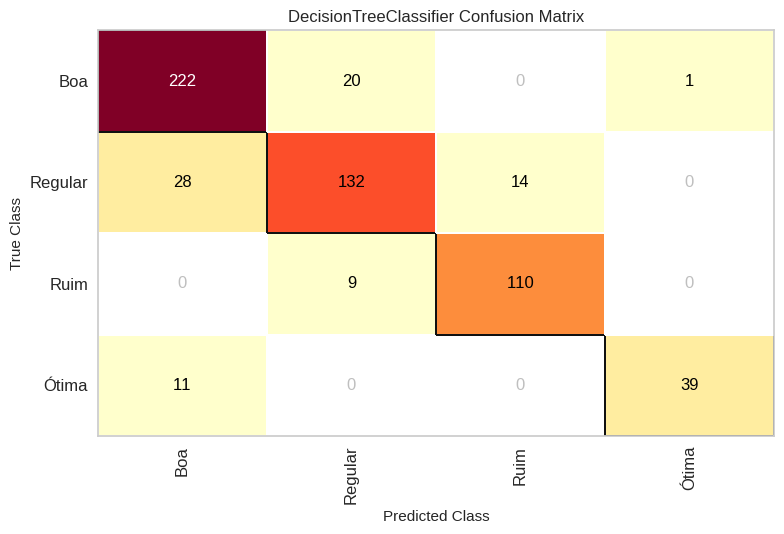

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(arvore_da_vida)
cm.fit(X1_train, y_train)
cm.score(X1_test, y_test)
cm.show()

A classe "Regular" está com ótimo desempenho (137 acertos e poucos erros).

A classe "Ótima" tem menos dados, e o modelo confunde bastante com “Boa”.

A classe "Ruim" também está bem classificada.

O modelo confunde "Boa" e "Ótima" com frequência, o que é esperado por serem classes próximas nos valores.

####Visualizando através de um dendrograma



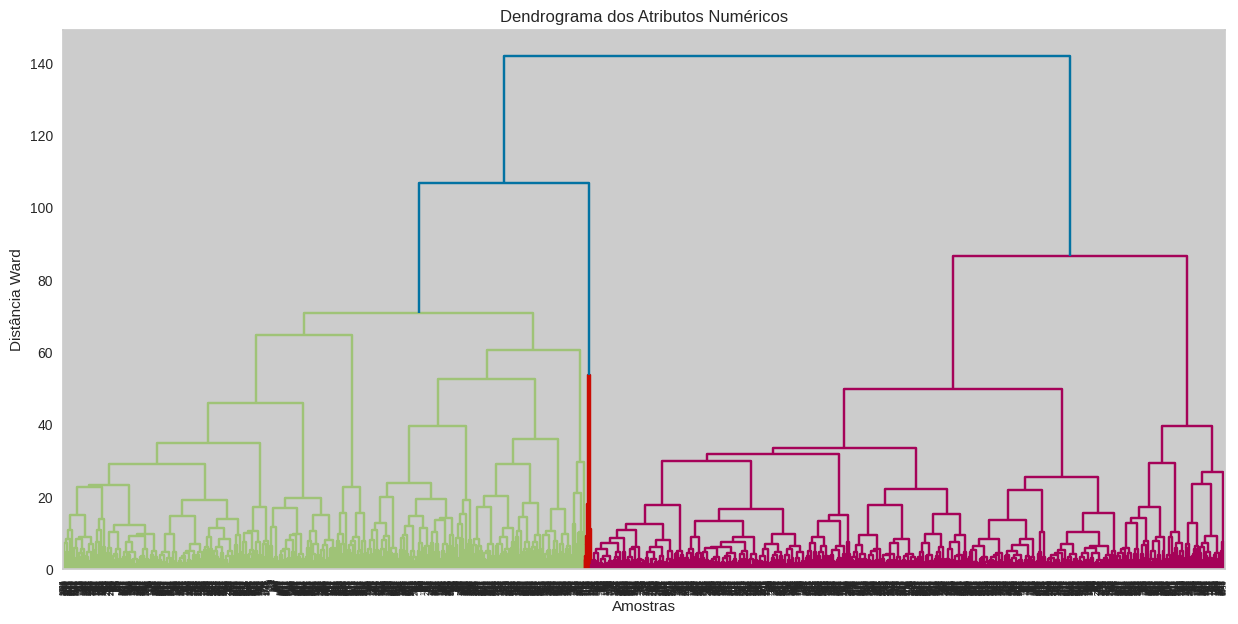

In [ ]:
# Seleciona apenas as colunas numéricas para o dendrograma
numeric_cols_for_dendro = df_padronizado.columns

# Realiza a padronização dos dados
scaler_dendro = StandardScaler()
X_scaled_dendro = scaler_dendro.fit_transform(df_padronizado[numeric_cols_for_dendro])

# Realiza a ligação hierárquica
linked = linkage(X_scaled_dendro, 'ward')

# Plota o dendrograma
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           labels=df_padronizado.index.tolist(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma dos Atributos Numéricos')
plt.xlabel('Amostras')
plt.ylabel('Distância Ward')
plt.show()


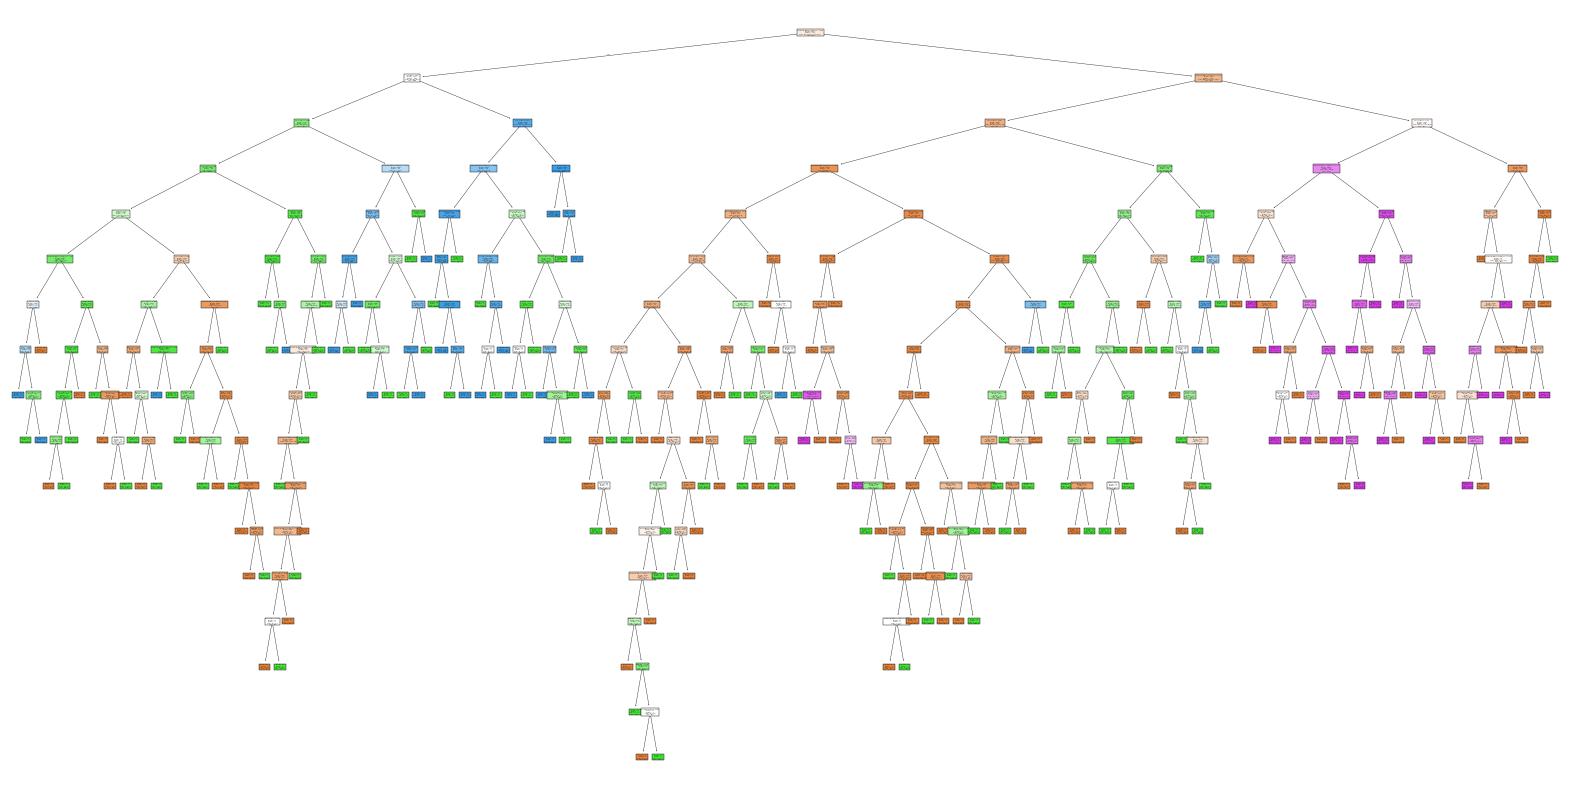

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    arvore_da_vida,
    filled=True,
    feature_names=X1_train.columns,
    class_names=arvore_da_vida.classes_.astype(str)
)
plt.show()

In [ ]:
profundidade = arvore_da_vida.get_depth()
print(f"Profundidade da árvore: {profundidade}")

Profundidade da árvore: 16


In [ ]:
n_nos = arvore_da_vida.get_n_leaves()
print(f"Número de folhas: {n_nos}")

total_de_nos = arvore_da_vida.tree_.node_count
print(f"Número total de nós: {total_de_nos}")

Número de folhas: 195
Número total de nós: 389


####Visualizando através de um modelo 2D PCA

A matriz de confusão mostrou que a árvore de decisão teve maior dificuldade em distinguir entre as classes "Boa" e "Ótima", além de algumas confusões com a classe "Regular".
Essa dificuldade é justificada visualmente pelo gráfico PCA 2D com cores das classes reais, que revela que as amostras dessas categorias se distribuem em regiões próximas ou até sobrepostas no espaço de maior variância dos dados.
Isso indica que, mesmo com um classificador adequado, os próprios atributos numéricos disponíveis não oferecem separação clara entre essas categorias, o que limita a performance do modelo.

#### Testes Adicionais

##### Diminuição da quantidade de colunas:
Na matriz de correlação foi evidenciado que alguns atributos possuem maior correlação, então decidimos por treinar o modelo considerando apenas as colunas que possuiam o módulo da correlação superior a 0,50.

In [ ]:
colunas = [ 'Adult Mortality',
        ' BMI ', ' HIV/AIDS',
       'Income composition of resources', 'Schooling']

In [ ]:
X2_train = pd.DataFrame(X_train, columns=colunas)
X2_test = pd.DataFrame(X_test, columns=colunas)

In [ ]:
X2_train.head()

,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
308,0.267187,0.577765,-0.303748,0.101719,0.538129
1966,-0.304146,0.717482,-0.323445,0.580697,0.240361
1318,-0.811103,-0.544957,-0.323445,1.216173,0.925228
1379,-1.310013,1.935011,-0.323445,-0.144884,-0.027631
1334,-0.392662,1.201500,-0.323445,0.519046,0.329691


In [ ]:
arvore_da_vida2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_da_vida2.fit(X2_train, y_train)
previsoes = arvore_da_vida2.predict(X2_test)

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         Boa       0.87      0.91      0.89       243
     Regular       0.81      0.77      0.79       174
        Ruim       0.90      0.91      0.90       119
       Ótima       0.98      0.90      0.94        50

    accuracy                           0.87       586
   macro avg       0.89      0.87      0.88       586
weighted avg       0.87      0.87      0.87       586



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



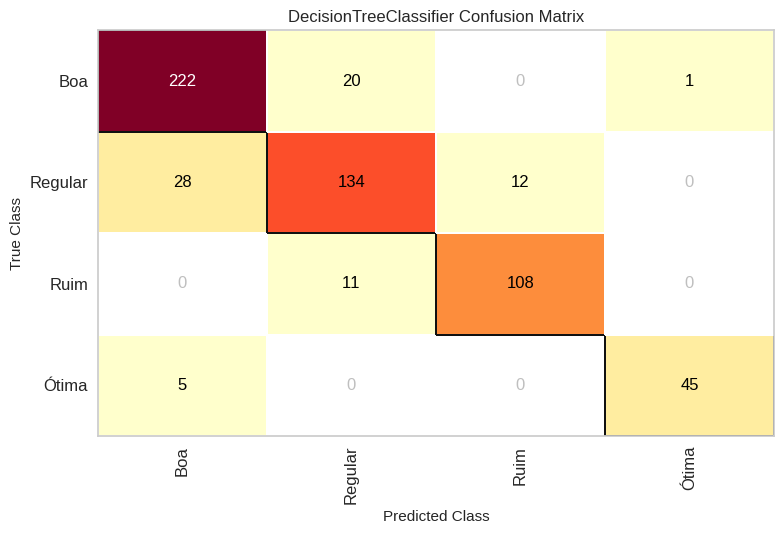

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(arvore_da_vida2)
cm.fit(X2_train, y_train)
cm.score(X2_test, y_test)
cm.show()

##### Testando o RandomForest:


In [ ]:
colunas = [ 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
        ' BMI ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'GDP',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [ ]:
X3_train = pd.DataFrame(X_train, columns=colunas)
X3_test = pd.DataFrame(X_test, columns=colunas)

In [ ]:
floresta = RandomForestClassifier(n_estimators=100, random_state=0)
floresta.fit(X3_train, y_train)
previsoes = floresta.predict(X3_test)

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         Boa       0.94      0.93      0.93       243
     Regular       0.89      0.89      0.89       174
        Ruim       0.93      0.96      0.95       119
       Ótima       0.94      0.94      0.94        50

    accuracy                           0.92       586
   macro avg       0.92      0.93      0.93       586
weighted avg       0.92      0.92      0.92       586



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



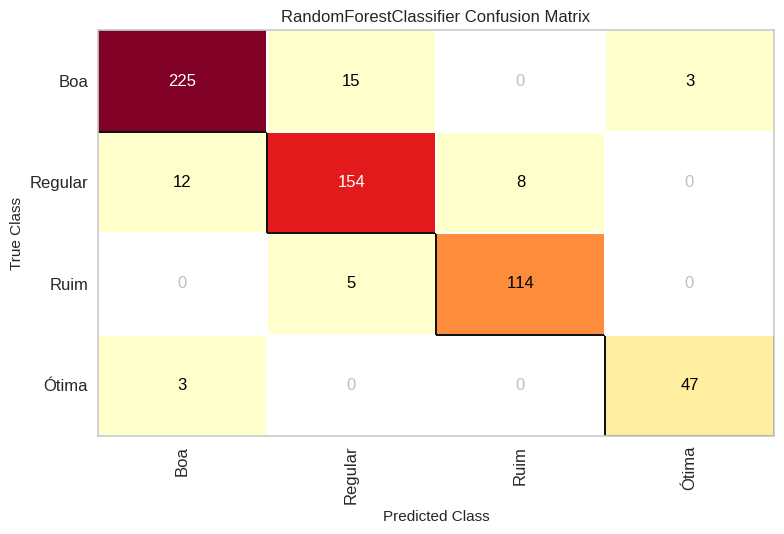

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(floresta)
cm.fit(X3_train, y_train)
cm.score(X3_test, y_test)
cm.show()

### 7.2 Rede Neural

In [ ]:
colunas = [ 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
        ' BMI ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'GDP',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Recria os DataFrames com nomes
X4_train = pd.DataFrame(X_train, columns=colunas)
X4_test = pd.DataFrame(X_test, columns=colunas)

In [ ]:
# Criar e treina o modelo
modelo1 = MLPClassifier(
    max_iter=1500,
    verbose = True,
    solver='adam',
    activation='relu',
    hidden_layer_sizes=(20, 20), # Quantidade de Neurônios
    random_state=0,
    tol=1e-3
)

modelo1.fit(X4_train, y_train)

# Avalia no conjunto de teste
y_pred = modelo1.predict(X4_test)

Iteration 1, loss = 1.87740949
Iteration 2, loss = 1.67170612
Iteration 3, loss = 1.49471958
Iteration 4, loss = 1.33116476
Iteration 5, loss = 1.17523355
Iteration 6, loss = 1.04157065
Iteration 7, loss = 0.94755289
Iteration 8, loss = 0.88529453
Iteration 9, loss = 0.83868906
Iteration 10, loss = 0.80305990
Iteration 11, loss = 0.77435727
Iteration 12, loss = 0.74909005
Iteration 13, loss = 0.72634048
Iteration 14, loss = 0.70545545
Iteration 15, loss = 0.68513094
Iteration 16, loss = 0.66770572
Iteration 17, loss = 0.65112470
Iteration 18, loss = 0.63542546
Iteration 19, loss = 0.62101950
Iteration 20, loss = 0.60682542
Iteration 21, loss = 0.59400868
Iteration 22, loss = 0.58181974
Iteration 23, loss = 0.56991437
Iteration 24, loss = 0.56061557
Iteration 25, loss = 0.55082523
Iteration 26, loss = 0.54263779
Iteration 27, loss = 0.53493604
Iteration 28, loss = 0.52720595
Iteration 29, loss = 0.52063621
Iteration 30, loss = 0.51379012
Iteration 31, loss = 0.50763096
Iteration 32, los

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Boa       0.86      0.86      0.86       243
     Regular       0.79      0.79      0.79       174
        Ruim       0.89      0.92      0.90       119
       Ótima       0.83      0.80      0.82        50

    accuracy                           0.84       586
   macro avg       0.84      0.84      0.84       586
weighted avg       0.84      0.84      0.84       586



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but MLPClassifier was fitted with feature names



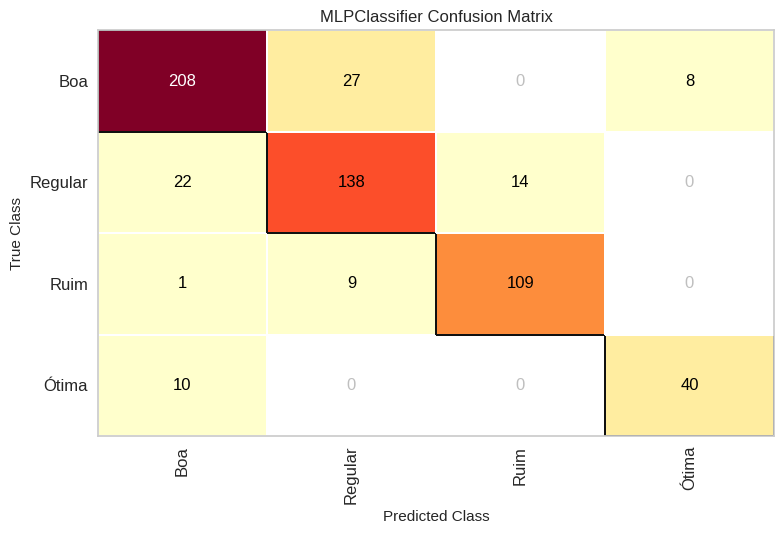

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
cm = ConfusionMatrix(modelo1)
cm.fit(X4_train, y_train)
cm.score(X4_test, y_test)
cm.show()

In [ ]:
configs = [
    (10,),
    (20,),
    (30,),
    (20, 20),
    (30, 15),
    (50, 20),
    (50, 30, 20)
]

resultados = {}

for config in configs:
    modelo = MLPClassifier(
        max_iter=1500,
        solver='adam',
        activation='relu',
        hidden_layer_sizes=config,
        random_state=10,
        tol=1e-3
    )

    modelo.fit(X4_train, y_train)
    y_pred = modelo.predict(X4_test)

    acc = accuracy_score(y_test, y_pred)
    n_iter = modelo.n_iter_
    report = classification_report(y_test, y_pred)

    resultados[config] = {
        'acuracia': acc,
        'n_iter': n_iter,
        'classification_report': report
    }

print("\n\nResumo dos resultados:")

for config, res in resultados.items():
    print("----------------------------------------------------------------")
    print(f"\nConfiguração: hidden_layer_sizes={config}")
    print(f"Acurácia: {res['acuracia']:.4f}")
    print(f"Número de iterações: {res['n_iter']}")
    print("Relatório por classe:\n", res['classification_report'])
    print("----------------------------------------------------------------")



Resumo dos resultados:
----------------------------------------------------------------

Configuração: hidden_layer_sizes=(10,)
Acurácia: 0.7952
Número de iterações: 204
Relatório por classe:
               precision    recall  f1-score   support

         Boa       0.81      0.85      0.83       243
     Regular       0.74      0.71      0.73       174
        Ruim       0.85      0.84      0.85       119
       Ótima       0.76      0.70      0.73        50

    accuracy                           0.80       586
   macro avg       0.79      0.78      0.78       586
weighted avg       0.79      0.80      0.79       586

----------------------------------------------------------------
----------------------------------------------------------------

Configuração: hidden_layer_sizes=(20,)
Acurácia: 0.8191
Número de iterações: 210
Relatório por classe:
               precision    recall  f1-score   support

         Boa       0.82      0.88      0.85       243
     Regular       0.79   